<a href="https://colab.research.google.com/github/Kimbaeda/youngwoo/blob/main/%EC%8B%A4%EC%A0%9C_%EB%89%B4%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A1%9C_%EB%89%B4%EC%8A%A4%EA%B8%B0%EC%82%AC_%EC%A3%BC%EC%A0%9C%EB%A5%BC_%EB%B6%84%EB%A5%98(lstm_%EC%A0%81%EC%9A%A9%ED%95%98%EA%B8%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 실제 뉴스 데이터로 뉴스기사 주제를 분류하는 텍스트 분류기 만들기
- RNN LSTM 적용하기

## 데이터 수집 및 전처리

크롤링은 한시간 정도 걸림.
크롤링한 데이터 csv로 저장 후 불러옴.

[데이터 다운 링크](https://drive.google.com/file/d/1NieEXeSqTXKtY2oQAi_WMZVwcnL9M6CG/view?usp=sharing)

In [ ]:
#데이터 입력
from google.colab import files
uploaded = files.upload()
my_data = 'news_data.csv'


Saving news_data.csv to news_data.csv


In [ ]:
import pandas as pd

df = pd.read_csv(my_data)
df.head()

,news,code
0,파주시청. 사진제공=파주시 파주시청. 사진제공=파주시\n\n[파주=파이낸셜뉴스 강근...,사회
1,동영상 뉴스\n\n이천 물류창고 화재 발화지점으로 지목된 지하 2층에서 산소절단기의...,사회
2,황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검. 사진...,사회
3,귀갓길 여성을 쫓아가 성범죄를 시도한 20대 남성이 구속됐습니다.서울 강남경찰서는 ...,사회
4,(서울=연합뉴스) 대한약사회가 6일부터 코로나바이러스 감염증 대응 체계를 '사회적 ...,사회


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5249 entries, 0 to 5248
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   news    5249 non-null   object
 1   code    5249 non-null   object
dtypes: object(2)
memory usage: 82.1+ KB


In [ ]:
# 정규 표현식을 이용해서 한글 외의 문자는 전부제거
df['news_clean'] = df['news'].str.replace("[^ㄱ-하-ㅣ가-힣]"," ") # 한글이 아니면 전부 제거

In [ ]:
# 데이터에 Null값이 없는지 확인
df.isna().sum()

news          0
code          0
news_clean    0
dtype: int64

In [ ]:
# 중복된 샘플들을 제거하세요.
df.drop_duplicates(subset=['news_clean'], inplace=True)
print('뉴스 기사의 갯수: ',len(df))

뉴스 기사의 갯수:  3985


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3985 entries, 0 to 4954
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   news        3985 non-null   object
 1   code        3985 non-null   object
 2   news_clean  3985 non-null   object
dtypes: object(3)
memory usage: 124.5+ KB


In [ ]:
news_clean = df['news_clean'].values.tolist()

In [ ]:
news_clean[0:5]

['파주시청  사진제공 파주시 파주시청  사진제공 파주시   파주 파이낸셜뉴스 강근주 기자  파주시는  일 관내 취약계층  만    가구에 대해 정부 긴급재난지원금 입금을 완료했다 파주시민이 받는 긴급재난지원금은   인 이상 가구  기준으로   만    원을 받게 되며   인 가구는   만    원   인 가구   만    원   인 가구   만    원이다 정부가 발표한 긴급재난지원금이 파주시민에게 지급한 금액과 다른 이유는 국비-지방비 부담 비율 때문이다 파주시는 이미 모든 시민에게  경기도-파주시 재난기본소득   인당 각   만원 을 지급하고 있어 시민에게 국비 지원금만 지급하며  인 가구 기준으로 총 지원 금액은  파주시 재난기본소득    만원   경기도 재난기본소득    만원   정부 긴급재난지원금    만    원 등 총    만    원을 받게 된다 취약계층이 아닌 시민은 오는  월  일부터 소지하고 있는 신용 체크카드사 홈페이지에서 긴급재난지원금 지원을 신청할 수 있다  세대주가 가족 지원금을 일괄 신청해야 한다 한편 파주시는  일 김정기 부시장을 단장으로 하는  긴급재난지원금 추진 태스크포스 를 구성해 긴급재난지원금이 원활하게 지급될 수 있도록 지원한다   저작권자   파이낸셜뉴스  무단 전재-재배포 금지',
 '동영상 뉴스  이천 물류창고 화재 발화지점으로 지목된 지하  층에서 산소절단기의 산소 공급 호스가 끊어진 채 발견돼  경찰이 폭발 가능성을 수사하고 있습니다    이 확보한 현장 감식 사진을 보면  산소절단기와 연결된 산소 공급 호스가 날카롭게 절단돼 있었습니다 이에 전문가들은 산소 공급 호스가  기계적 충격에 의해 절단이 됐고  실제 산소가 샜다면 폭발이 일어날 수 있다 는 의견을 제시했습니다 지하  층에선 이 밖에도 전동절단기와 그라인더 등 불꽃을 발생시킬 수 있는 작업 도구가 다수 나와 경찰이 집중 분석하고 있습니다 경찰은 또 건물 옆에서 우레탄을 혼합해 작업 현장으로 보내는 차량을 발견해  화재 당시 우레탄폼 발포 작업과 함께 

In [ ]:
# 총 샘플의 갯수
len(news_clean)

3985

In [ ]:
df.code.unique()

array(['사회', '생활/문화', 'IT/과학'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder


y = df['code'].values

encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values
Y

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [ ]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눔
x_train, x_test,y_train, y_test = train_test_split(
    df.news_clean, Y,test_size=0.2, random_state=1)

## 토큰화

In [ ]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 33.7MB/s 
     |████████████████████████████████| 92kB 6.2MB/s 
     |████████████████████████████████| 450kB 34.5MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
from konlpy.tag import Okt

okt = Okt()


In [ ]:
X_train = []
for sentence in x_train:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

In [ ]:
print(X_train[:3])

[['박', '문정', '교수', '박', '문정', '교수', '리튬', '유기', '전지', '개념', '리튬', '유기', '전지', '개념', '포항', '뉴시스', '강', '진구', '기자', '포스텍', '화학', '박', '문정', '교수', '김보람', '씨', '커피', '원', '재료', '인', '카페', '인산', '을', '원료', '로', '합성', '폴리', '비닐', '카테콜', '고분자', '양', '극', '재', '로', '사용', '자연', '친', '화', '적', '인', '리튬', '유기', '전지', '개발', '일', '밝히다', '리튬이온', '만', '선택', '적', '움직이다', '고분자', '나노입자', '전해질', '로', '사용', '고속', '충전', '을', '가능', '케', '방법', '을', '찾아내다', '현재', '까지', '리튬', '유기', '전지', '지속', '적', '인', '연구', '에도', '불구', '용량', '작다', '수명', '짧다', '충전', '속도', '느리다', '늘다', '평가', '받다', '오다', '리튬', '이온', '전지', '전해질', '음극', '양극', '을', '담그다', '구조', '다', '리튬', '이온', '전해질', '을', '이동해', '양극', '에서', '음극', '충전', '되다', '음극', '에서', '양극', '방전', '되다', '과정', '반복', '되다', '즉', '전해질', '리튬', '이온', '이동', '수', '있다', '성질', '을', '가지다', '물질', '인', '셈', '이다', '대부분', '리튬', '이온', '전지', '전이금속', '양', '극', '재', '액체', '유기', '화합물', '을', '전해질', '로', '사용', '하고', '있다', '전이금속', '이란', '원자', '전자', '배치', '에서', '가장', '바깥', '부분', '껍질', '불완전하다', '양이온', '

In [ ]:
X_test = []
for sentence in x_test:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

## 정수 인코딩

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [76]:
# print(tokenizer.word_index)

In [ ]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 29082
등장 빈도가 2번 이하인 희귀 단어의 수: 12312
단어 집합에서 희귀 단어의 비율: 42.3354652362286
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.6677184731656376


In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 16771


In [ ]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train[:3])

[[719, 4794, 168, 719, 4794, 168, 4435, 3487, 3349, 2081, 4435, 3487, 3349, 2081, 931, 111, 814, 7742, 17, 3769, 1416, 719, 4794, 168, 8681, 82, 1271, 46, 1559, 15, 1492, 7371, 1, 2037, 5, 2471, 4662, 6209, 14419, 3946, 402, 1090, 18, 5, 118, 1622, 2038, 124, 11, 15, 4435, 3487, 3349, 73, 6, 33, 8682, 24, 437, 11, 3619, 3946, 9218, 4136, 5, 118, 2929, 1532, 1, 3250, 5742, 562, 1, 4918, 173, 29, 4435, 3487, 3349, 369, 11, 15, 204, 125, 1834, 1171, 1091, 6739, 2878, 1532, 882, 4436, 48, 237, 25, 42, 4435, 4795, 3349, 4136, 10616, 8186, 1, 9219, 686, 22, 4435, 4795, 4136, 1, 5570, 8186, 4, 10616, 1532, 3, 10616, 4, 8186, 8187, 3, 257, 2207, 3, 3251, 4136, 4435, 4795, 1113, 10, 2, 7055, 1, 961, 606, 15, 2082, 7, 772, 4435, 4795, 3349, 7056, 402, 1090, 18, 6449, 3487, 5974, 1, 4136, 5, 118, 13, 2, 7056, 1237, 5571, 122, 1756, 4, 208, 5743, 433, 6210, 1, 178, 5, 1921, 9836, 1, 35, 7056, 7743, 3546, 477, 92, 4663, 2, 6449, 4136, 7744, 10617, 5, 1640, 2830, 1800, 346, 107, 2060, 805, 2, 9220, 

## 빈 샘플(empty samples) 제거

In [ ]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [ ]:
import numpy as np

# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

3188
3188


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


## 패딩

기사의 최대 길이 : 5421
기사의 평균 길이 : 301.56148055207024


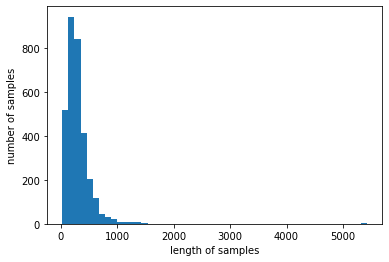

In [ ]:
import matplotlib.pyplot as plt

print('기사의 최대 길이 :',max(len(l) for l in X_train))
print('기사의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [ ]:
max_len = 1000
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 1000 이하인 샘플의 비율: 98.68255959849435


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3188,)
(797,)
(3188, 3)
(797, 3)


## 모델

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         1677100   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 1,794,735
Trainable params: 1,794,735
Non-trainable params: 0
_________________________________________________________________


In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
43/43 [==============================] - 99s 2s/step - loss: 1.0250 - acc: 0.4471 - val_loss: 0.8623 - val_acc: 0.5690

Epoch 00001: val_acc improved from -inf to 0.56897, saving model to best_model.h5
Epoch 2/15
43/43 [==============================] - 94s 2s/step - loss: 0.5985 - acc: 0.7459 - val_loss: 0.5908 - val_acc: 0.7398

Epoch 00002: val_acc improved from 0.56897 to 0.73981, saving model to best_model.h5
Epoch 3/15
43/43 [==============================] - 94s 2s/step - loss: 0.3411 - acc: 0.8867 - val_loss: 0.5463 - val_acc: 0.7759

Epoch 00003: val_acc improved from 0.73981 to 0.77586, saving model to best_model.h5
Epoch 4/15
43/43 [==============================] - 94s 2s/step - loss: 0.2118 - acc: 0.9255 - val_loss: 0.8187 - val_acc: 0.7414

Epoch 00004: val_acc did not improve from 0.77586
Epoch 5/15
43/43 [==============================] - 94s 2s/step - loss: 0.1060 - acc: 0.9671 - val_loss: 0.5686 - val_acc: 0.7994

Epoch 00005: val_acc improved from 0.77586 

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

25/25 [==============================] - 7s 272ms/step - loss: 0.6902 - acc: 0.8218

 테스트 정확도: 0.8218


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.87      0.77      0.81       166
           1       0.83      0.84      0.83       339
           2       0.79      0.83      0.81       292

    accuracy                           0.82       797
   macro avg       0.83      0.81      0.82       797
weighted avg       0.82      0.82      0.82       797

[[127  19  20]
 [ 11 285  43]
 [  8  41 243]]


## 예측

In [ ]:
def sentiment_predict(new_sentence):
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = df.code.unique()[model.predict_classes(pad_new)] # 예측
  return score

In [ ]:
sentiment_predict('한남대 조형예술학부 회화전공 박경범 교수(왼쪽)가 이광섭 총장에게 발전기금')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array(['생활/문화'], dtype=object)

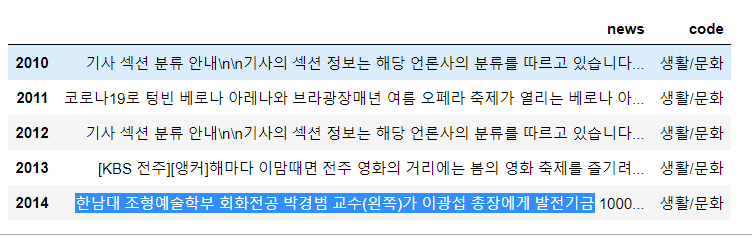

In [ ]:
sentiment_predict('귀갓길 여성을 쫓아가 성범죄를 시도한 20대 남성이 구속됐습니다.')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array(['사회'], dtype=object)

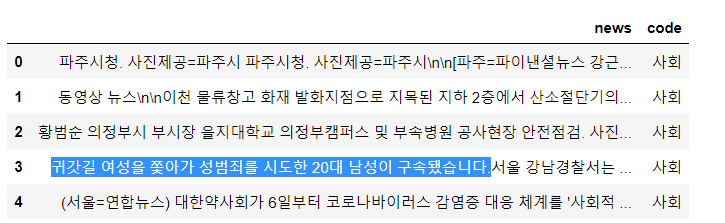

In [ ]:
sentiment_predict('머리를 긁고 있는 오랑우탄. 몸을 긁는 행동을 따라 하는 것은 부정적 감정과 관련')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array(['IT/과학'], dtype=object)

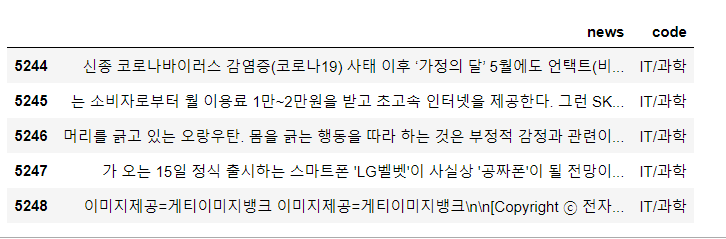